In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pickle as pkl
import matplotlib.pyplot as plt

# Data cleaning

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the original CSV file
original_csv_file = "data.csv"
df = pd.read_csv(original_csv_file)

# Split the dataset into training and testing sets (70% training, 30% testing)
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)

# Save the training and testing data to separate CSV files
train_csv_file = "train.csv"
test_csv_file = "test.csv"
train_df.to_csv(train_csv_file, index=False)
test_df.to_csv(test_csv_file, index=False)

# Print the sizes of the training and testing sets
print("Training set size:", len(train_df))
print("Testing set size:", len(test_df))


Training set size: 80
Testing set size: 20


In [97]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()

,spelling_accuracy,gramatical_accuracy,percentage_of_corrections,percentage_of_phonetic_accuraccy,presence_of_dyslexia
0,98.488121,99.568966,8.108108,98.679302,0
1,99.007444,99.503722,6.849315,99.267572,0
2,93.269231,99.029126,0.000000,94.618687,1
3,97.389034,99.475066,11.428571,97.990193,1
4,98.250729,99.705015,5.263158,98.676661,0


In [116]:
x_train = train_data.drop(["presence_of_dyslexia" , "percentage_of_phonetic_accuraccy"], axis= "columns")
x_test = test_data.drop(["presence_of_dyslexia" , "percentage_of_phonetic_accuraccy"], axis= "columns")
y_train = train_data.presence_of_dyslexia
y_test = test_data.presence_of_dyslexia

# Training a Logistic regression Model

In [99]:
model_logistic = LogisticRegression()
model_logistic.fit(x_train, y_train)
print(model_logistic.score(x_test, y_test))
print(model_logistic.score(x_train,y_train))

1.0
0.925


In [100]:
print(classification_report(model_logistic.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



<Axes: >

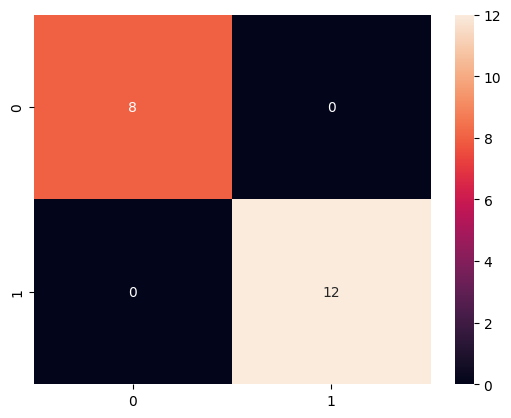

In [101]:
sns.heatmap(confusion_matrix(model_logistic.predict(x_test), y_test), annot=True)

<Axes: >

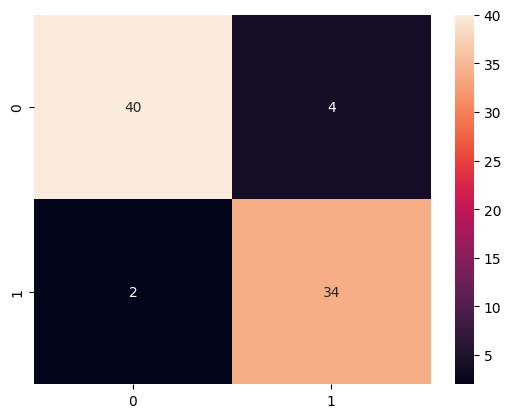

In [102]:
sns.heatmap(confusion_matrix(model_logistic.predict(x_train), y_train), annot=True)

# Training a Decision Tree classifier

In [117]:
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [118]:
y_pred = model_DT.predict(x_test)
y_train_pred = model_DT.predict(x_train)

In [119]:
accuracy_test = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy_test)

Accuracy: 0.85


In [120]:
accuracy_train = accuracy_score(y_train, y_train_pred)

# Print accuracy
print("Accuracy:", accuracy_train)

Accuracy: 1.0


In [121]:
print(model_DT.score(x_test, y_test))
print(model_DT.score(x_train, y_train))

0.85
1.0


In [122]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 5  3]
 [ 0 12]]


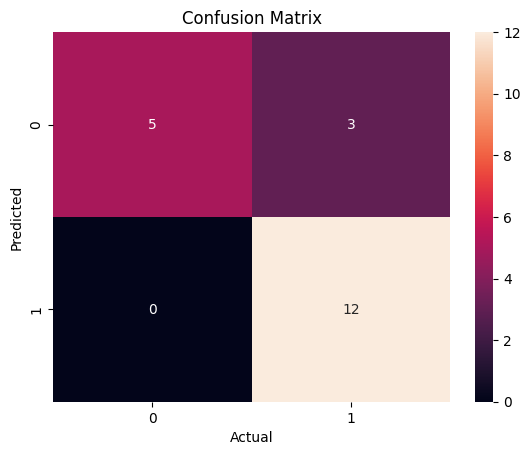

In [123]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [124]:
print(classification_report(model_DT.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.80      0.89        15

    accuracy                           0.85        20
   macro avg       0.81      0.90      0.83        20
weighted avg       0.91      0.85      0.86        20



<Axes: >

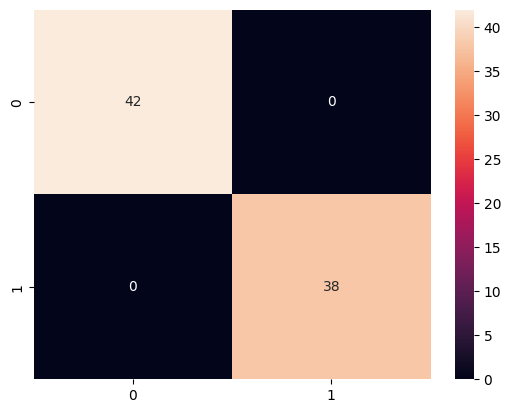

In [24]:
sns.heatmap(confusion_matrix(model_DT.predict(x_train), y_train), annot=True)

# Training A Linear support vector machine

In [14]:
model_svc_linear = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
model_svc_linear.fit(x_train, y_train)

SVC(kernel='linear', shrinking=False)

In [15]:
print(model_svc_linear.score(x_test, y_test))
print(model_svc_linear.score(x_train, y_train))

0.9666666666666667
0.9571428571428572


In [41]:
print(classification_report(model_svc_linear.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train, y_train)

RandomForestClassifier()

# Exporting the best model

### from the above models the Descision tree classifier performed the best.  

In [13]:
pkl.dump(model_DT, open("Decision_tree_model.sav", 'wb'))